In [2]:
import glob 
import pathlib
import os
import shutil
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np
import cv2

In [3]:
data_dir = glob.glob(r"C:\Users\asus\Desktop\Stroke Segmentation\ISKEMI\PNG\*")

### Rename files

rename :  10003.png -------> 10003.iskemi.png

In [4]:
for i in data_dir: 
    old_name = i
    a = i[:58]
    new_name = a + str(".iskemi.png")
    os.rename(old_name,new_name)

In [5]:
mask_dir = glob.glob(r"C:\Users\asus\Desktop\Stroke-Segmentation\ISKEMI\MASK\*")

rename : 10003.png -------> 10003.iskemimasK.png

In [6]:
for i in mask_dir:
    old = i
    a = i[:59]
    new = a + str(".iskemimask.png")
    os.rename(old,new)

### Convert png file to numpy file

In [7]:
data_dir = glob.glob(r"C:\Users\asus\Desktop\Stroke Segmentation\ISKEMI\PNG\*")
for i in data_dir:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    np.save("C:/Users/asus/Desktop/Stroke Segmentation/iskeminumpy/npy/" + str(i[53:66]) +"npy" ,img)
       
        

In [ ]:
deneme = np.load(r"C:\Users\asus\Desktop\Stroke Segmentation\iskeminumpy\npy\10003.iskemi.npy")

In [ ]:
deneme.shape

In [ ]:
mask_dir = glob.glob(r"C:\Users\asus\Desktop\Stroke Segmentation\ISKEMI\MASK\*")
for i in mask_dir:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    np.save("C:/Users/asus/Desktop/Stroke Segmentation/iskeminumpy/mask/" + str(i[54:70]) +".npy" ,img)
    

### split folder as train and test

     ISKEMI folder          =>    data
        |                         |
        |------- MASK(1130)       |-----train(%80 = 904)
        |                         |       |
        |                         |       |__________ PNG
        |                         |       |___________MASK
        |--------PNG(1130)        |------ test(%20 = 226)
        |                         |       |
        |                         |       |________PNG
        |                         |       |________MASK

In [17]:
import splitfolders

In [18]:
input_folder = 'C:/Users/asus/Desktop/Stroke Segmentation/iskeminumpy/'

In [19]:
output_folder = 'C:/Users/asus/Desktop/Stroke Segmentation/data/'

In [ ]:
splitfolders.ratio(input_folder , output_folder, seed=42, ratio=(.80,.20),group_prefix = None)

In [ ]:
a= np.load("C:/Users/asus/Desktop/Stroke Segmentation/data/test/mask/10003.iskemimask.npy")

In [22]:
a

'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\ISKEMI\\MASK\\17032'

### Create a single numpy file

In [24]:
x_train_dir = glob.glob(r"C:\Users\asus\Desktop\Stroke-Segmentation\data\train\npy\*")
x_train_dir

['C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10017.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10024.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10038.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10053.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10059.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10062.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10072.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10073.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10077.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10088.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\\train\\npy\\10101.iskemi.npy',
 'C:\\Users\\asus\\Desktop\\Stroke-Segmentation\\data\

In [25]:
len(x_train_dir)

904

Check png data min and max value

In [26]:
data_directory = 'C:/Users/asus/Desktop/Stroke-Segmentation/ISKEMI/PNG/'
data_directory = pathlib.Path(data_directory)
denemee = list(data_directory.glob('*.iskemi.png'))
for i in denemee:
    photo = cv2.imread(str(i))
    if photo.min() != 0:
        photo.min()
    if photo.max() != 255:
        photo.max()
    

### resize photos of different sizes than desired value

In [27]:
x_train_list = []

for i in x_train_dir:
    a = np.load(i)
    resize = cv2.resize(a,(128,128))
    x_train_list.append(resize)

In [28]:
x_train_list = np.array(x_train_list)

In [29]:
x_train_list.shape

(904, 128, 128, 3)

In [30]:
x_train= np.array(x_train_list)

In [31]:
type(x_train)

numpy.ndarray

In [32]:
np.save('C:/Users/asus/Desktop/Stroke-Segmentation/data/x_train.npy',x_train) #save x_train as a npy file

In [33]:
ex = np.load('C:/Users/asus/Desktop/Stroke-Segmentation/data/x_train.npy')   #chech if its right
ex.shape

(904, 128, 128, 3)

In [34]:
y_train_dir = glob.glob(r"C:\Users\asus\Desktop\Stroke Segmentation\data\train\mask\*")
len(y_train_dir) 

0

### The function that performs the operations given above:

In [35]:
def resize128(path,dest_path):
    path = glob.glob(path)
    a_list = []

    for i in path:
        a = np.load(i)
        resize = cv2.resize(a,(128,128))
        a_list.append(resize)
    a_np_list = np.array(a_list)
    np.save(dest_path,a_np_list)
    print("Successfully saved!")
    print(dest_path.split("/")[-1],"'s shape:")
    load = np.load(dest_path)
    return load.shape, load

In [36]:
resize128(path =r"C:\Users\asus\Desktop\Stroke-Segmentation\data\train\mask\*",dest_path="C:/Users/asus/Desktop/Stroke-Segmentation/data/y_train.npy")

Successfully saved!
y_train.npy 's shape:


((904, 128, 128, 3),
 array([[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         ...,
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]],
 
 
        [[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0

In [37]:
resize128(path =r"C:\Users\asus\Desktop\Stroke-Segmentation\data\test\mask\*",dest_path="C:/Users/asus/Desktop/Stroke-Segmentation/data/y_test.npy")

Successfully saved!
y_test.npy 's shape:


((226, 128, 128, 3),
 array([[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         ...,
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]],
 
 
        [[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0

In [38]:
resize128(path =r"C:\Users\asus\Desktop\Stroke-Segmentation\data\test\npy\*",dest_path="C:/Users/asus/Desktop/Stroke-Segmentation/data/x_test.npy")

Successfully saved!
x_test.npy 's shape:


((226, 128, 128, 3),
 array([[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         ...,
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]],
 
 
        [[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0

#### x_train, y_train , x_test ve y_test npy files was created 

### RGB to GRAY

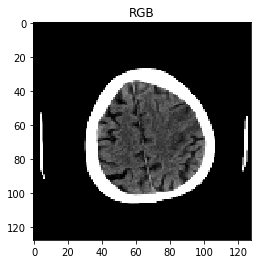

x_train shape is: (904, 128, 128, 3)


In [39]:
x_train = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\data\x_train.npy")

plt.imshow(x_train[0], interpolation='nearest')
plt.title("RGB")
plt.show()
print("x_train shape is:" , x_train.shape)


In [40]:
def rgbtogray(npy_file_path, dest_path):
    path = np.load(npy_file_path)
    new =[]
    for a in path:
        gray_img = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
        new.append(gray_img)
    plt.imshow(new[0], interpolation='nearest')
    
    np.save(dest_path,new)
    print("File is converted rgb to gray! ")
    print("First file look like this:")
    plt.show()
    print("destination path is: ", dest_path )
    return(gray_img.shape)
    

File is converted rgb to gray! 
First file look like this:


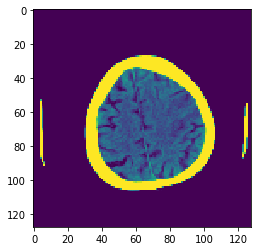

destination path is:  C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\x_train.npy


(128, 128)

In [41]:
rgbtogray(r"C:\Users\asus\Desktop\Stroke-Segmentation\data\x_train.npy",r"C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\x_train.npy")

File is converted rgb to gray! 
First file look like this:


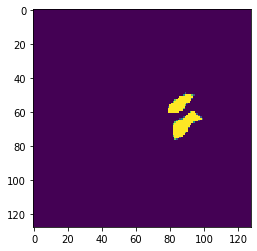

destination path is:  C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\y_train.npy


(128, 128)

In [42]:
rgbtogray(r"C:\Users\asus\Desktop\Stroke-Segmentation\data\y_train.npy",r"C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\y_train.npy")

File is converted rgb to gray! 
First file look like this:


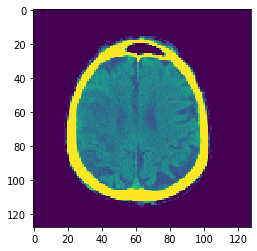

destination path is:  C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\x_test.npy


(128, 128)

In [43]:
rgbtogray(r"C:\Users\asus\Desktop\Stroke-Segmentation\data\x_test.npy",r"C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\x_test.npy")

File is converted rgb to gray! 
First file look like this:


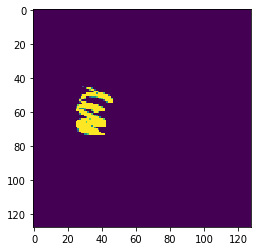

destination path is:  C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\y_test.npy


(128, 128)

In [44]:
rgbtogray(r"C:\Users\asus\Desktop\Stroke-Segmentation\data\y_test.npy",r"C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\y_test.npy")

## Reshape (128,128) -------> (128,128,1)

In [45]:
def xxtoxx1(src_path,dest_path):
    path =np.load(src_path)
    onechannel_npy=[]
    path_train = path.reshape(path.shape[0], path.shape[1], path.shape[2],1)
    for i in path_train:
        onechannel_npy.append(i)
    np.save(dest_path,onechannel_npy)
    
    after = np.load(dest_path).shape 
    print("before transform "+ src_path.split("\\")[-1]+" shape is : ",path.shape )
    print("after transform " +  src_path.split("\\")[-1]+" shape is : ",after)

In [46]:
xxtoxx1(r"C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\y_test.npy",r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_test.npy")

before transform y_test.npy shape is :  (226, 128, 128)
after transform y_test.npy shape is :  (226, 128, 128, 1)


In [47]:
xxtoxx1(r"C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\x_test.npy",r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_test.npy")

before transform x_test.npy shape is :  (226, 128, 128)
after transform x_test.npy shape is :  (226, 128, 128, 1)


In [48]:
xxtoxx1(r"C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\y_train.npy",r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_train.npy")

before transform y_train.npy shape is :  (904, 128, 128)
after transform y_train.npy shape is :  (904, 128, 128, 1)


In [49]:
xxtoxx1(r"C:\Users\asus\Desktop\Stroke-Segmentation\finaldata\x_train.npy",r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_train.npy")

before transform x_train.npy shape is :  (904, 128, 128)
after transform x_train.npy shape is :  (904, 128, 128, 1)


# Load the data 

In [50]:
x_train = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_train.npy") #*******
x_train.shape

(904, 128, 128, 1)

In [76]:
x_test = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_test.npy")  #*******
x_test.shape

(226, 128, 128, 1)

In [51]:
y_train = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_train.npy")
y_train.shape

(904, 128, 128, 1)

In [52]:
y_test = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_test.npy")
y_test.shape

(226, 128, 128, 1)

In [53]:
y_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


### reshape  y_train and y_test using concatenate (x,128,128,1) ---> (x,128,128,2)

In [83]:
#burada y_test ve y_train'i kendisinin tam tersi ile concat ediyoruz. 
#Böylece arka arkaya iki sınıf olacak ve bunlardan 0. class olanında boyalı olan pixeller 1. classta boyasız olacak.
#Yani basitçe my_array = [0,1,0,1,1,0] ise bununla 0 ve 1 lerin zıt halini yani [1,0,1,0,0,1] dizisini concat ediyoruz.
#Zıt hale getirmek için hepsinden 1 çıkarıyoruz [-1,0,-1,0,0,-1] oluyor ve daha sonra bunun mutlak değerini alıyoruz [1,0,1,0,0,1] elde ediyoruz.

In [92]:
out=np.absolute(y_test-1)
out.shape

(226, 128, 128, 1)

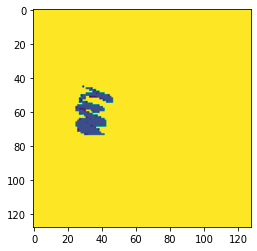

In [55]:
plt.imshow(out[0,:,:,0])

In [56]:
concat = np.concatenate((y_test,out),axis=3)

In [57]:
concat.shape

(226, 128, 128, 2)

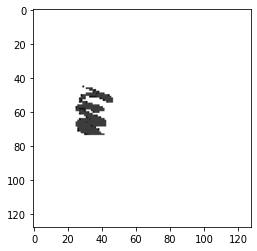

In [58]:
plt.imshow(concat[0,:,:,1],cmap="gray")

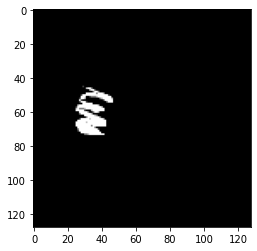

In [59]:
plt.imshow(concat[0,:,:,0],cmap="gray")

In [93]:
# -1 çıkardığımda türlerden kaynaklı olarak -1 değerleri için 255 atandı bu nedenle bunları 1 yapmak için bütün matrisi 255'e bölüyorum.

In [94]:
final = concat.astype("float")/255

In [95]:
np.save(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_test2.npy",final)

In [96]:
y_test2 = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_test2.npy") #*********
y_test2

array([[[[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        ...,

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]]],


       [[[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
   

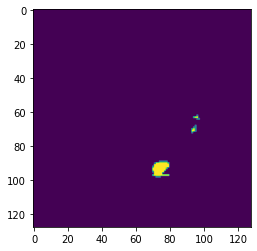

In [97]:
plt.imshow(y_test2[1,:,:,0])

In [98]:
out2=np.absolute(y_train-1)
out2.shape

(904, 128, 128, 1)

In [99]:
concat_tr = np.concatenate((y_train,out2),axis=3)

In [100]:
concat_tr.shape

(904, 128, 128, 2)

In [101]:
concat_tr

array([[[[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]],

        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]],

        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]],

        ...,

        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]],

        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]],

        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]]],


       [[[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0

In [104]:
final_tr = concat_tr.astype("float")/255

In [105]:
np.save(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_train2.npy",final_tr)

In [106]:
y_train2 = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_train2.npy") #********************

In [107]:
y_train2.shape

(904, 128, 128, 2)

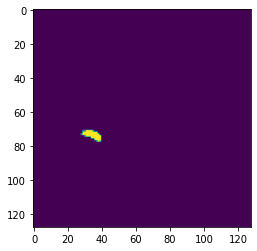

In [108]:
plt.imshow(y_train2[1,:,:,0])

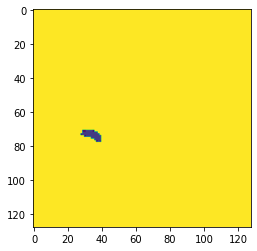

In [109]:
plt.imshow(y_train2[1,:,:,1])

In [110]:
#burada x_testi dönüştürdüm çünkü x_test ile prediction yapıp ulaştığım y'lerde sorun olmuştu ve confussion matrixte türden olayı hata aldım.
#bunu düzeltmek için dönüştürdüm ancak işe yaramadı ve diğer notebookta da normal x_test'i kullandım. Concatenate ederek oluşturduğumu değil.

In [111]:
x_out = np.absolute(x_test-1)
x_out.shape

(226, 128, 128, 1)

In [112]:
concat_test = np.concatenate((x_test,x_out),axis=3)
final_test = concat_test.astype("float")/255
final_test

array([[[[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        ...,

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]]],


       [[[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
   

In [113]:
np.save(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_test2.npy",final_test)

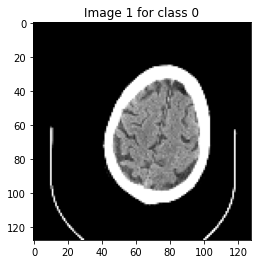

In [120]:
x_test2 = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_test2.npy")  
plt.imshow(x_test2[1,:,:,0], cmap ="gray")
plt.title("Image 1 for class 0")
plt.show()

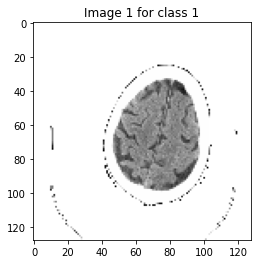

In [121]:
plt.imshow(x_test2[1,:,:,1], cmap ="gray")
plt.title("Image 1 for class 1")
plt.show()